In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder \
.master("local[4]") \
.appName("PreprocessOps") \
.config("spark.executor.memory","4g") \
.config("spark.driver.memory","2g") \
.getOrCreate()

In [4]:
df = spark.read \
.option("header","True") \
.option("inferSchema","True") \
.option("sep",",") \
.csv("Q:\\SparkDatasets\\d1.csv")

In [5]:
df.toPandas().head(100)

,sirano,isim,yas,cinsiyet,meslek,sehir,aylik_gelir,mal_mulk
0,1,Cemal,35,E,Isci,Adana,3500.0,araba
1,2,ceyda,42,K,Memur,Kayseri,4200.0,araba|ev
2,3,Timur,30,None,Muzisyen,Adana,9000.0,araba|ev|yazlik
3,4,Burcu,29,K,Pazarlamaci,Trabzon,4200.0,araba
4,5,Yasemin,23,K,Pazarlamaci,Bursa,4800.0,araba
5,6,Ali,33,E,Memur,Trabzon,4250.0,ev
6,7,Dilek,29,K,Pazarlamaci,Istanbul,7300.0,araba|yazlik
7,8,Murat,31,E,Muzisyen,Istanbul,12000.0,araba|ev|dukkan|yazlik
8,9,Ahmet,33,E,Doktor,Trabzon,180000.0,araba|ev|yazlik
9,10,Muhittin,46,E,Berber,Istanbul,12000.0,araba|ev|dukkan


**Adding Tag at DataSet**

// Sınıflandırma hedef değişken (etiket-label) yaratmak adına

// Geliri 7000 üstü olanların ekonomik_durumu iyi diyelim.

In [6]:
from pyspark.sql.functions import *

In [7]:
df1 = df.withColumn("ekonomik_durum",
when(col("aylik_gelir") >= 7000, "iyi").otherwise("kötü")
)

df1.toPandas().head(15)

,sirano,isim,yas,cinsiyet,meslek,sehir,aylik_gelir,mal_mulk,ekonomik_durum
0,1,Cemal,35,E,Isci,Adana,3500.0,araba,kötü
1,2,ceyda,42,K,Memur,Kayseri,4200.0,araba|ev,kötü
2,3,Timur,30,None,Muzisyen,Adana,9000.0,araba|ev|yazlik,iyi
3,4,Burcu,29,K,Pazarlamaci,Trabzon,4200.0,araba,kötü
4,5,Yasemin,23,K,Pazarlamaci,Bursa,4800.0,araba,kötü
5,6,Ali,33,E,Memur,Trabzon,4250.0,ev,kötü
6,7,Dilek,29,K,Pazarlamaci,Istanbul,7300.0,araba|yazlik,iyi
7,8,Murat,31,E,Muzisyen,Istanbul,12000.0,araba|ev|dukkan|yazlik,iyi
8,9,Ahmet,33,E,Doktor,Trabzon,180000.0,araba|ev|yazlik,iyi
9,10,Muhittin,46,E,Berber,Istanbul,12000.0,araba|ev|dukkan,iyi


**1. STRINGINDEXER STEP**

In [8]:
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler, StandardScaler

**StringIndexer for meslek column**

In [9]:
meslek_indexer = StringIndexer() \
.setInputCol("meslek") \
.setOutputCol("meslek_index") \
.setHandleInvalid("skip") 

meslek_indexer_model = meslek_indexer.fit(df1)
meslek_idexer_df = meslek_indexer_model.transform(df1)

In [10]:
meslek_idexer_df.toPandas().head(15)

,sirano,isim,yas,cinsiyet,meslek,sehir,aylik_gelir,mal_mulk,ekonomik_durum,meslek_index
0,1,Cemal,35,E,Isci,Adana,3500.0,araba,kötü,6.0
1,2,ceyda,42,K,Memur,Kayseri,4200.0,araba|ev,kötü,2.0
2,3,Timur,30,None,Muzisyen,Adana,9000.0,araba|ev|yazlik,iyi,1.0
3,4,Burcu,29,K,Pazarlamaci,Trabzon,4200.0,araba,kötü,0.0
4,5,Yasemin,23,K,Pazarlamaci,Bursa,4800.0,araba,kötü,0.0
5,6,Ali,33,E,Memur,Trabzon,4250.0,ev,kötü,2.0
6,7,Dilek,29,K,Pazarlamaci,Istanbul,7300.0,araba|yazlik,iyi,0.0
7,8,Murat,31,E,Muzisyen,Istanbul,12000.0,araba|ev|dukkan|yazlik,iyi,1.0
8,9,Ahmet,33,E,Doktor,Trabzon,180000.0,araba|ev|yazlik,iyi,3.0
9,10,Muhittin,46,E,Berber,Istanbul,12000.0,araba|ev|dukkan,iyi,7.0


// En çok tekrarlanandan en az tekrarlanana dogru sıralıyor en çok tekrarlanan sıfırdan baslamak üzere en az tekrarlanana dogru sıralıyor.

**Frequency of "Meslek" Columns Values:**

In [11]:
df1.groupBy(col("meslek")) \
.agg(count("*").alias("sayi")) \
.sort(desc("sayi")) \
.toPandas().head()

,meslek,sayi
0,Pazarlamaci,3
1,Muzisyen,3
2,Memur,2
3,Doktor,2
4,Isci,1


// Goruldugu gibi Pazarlamaci 0.0 Indexer almıs Muzisyen 0.1 ve Memur 0.2 şeklinde sıklıklarına göre değerlerini almıslar.

**Frequency of "Sehir" Columns Values:**

In [12]:
df1.groupBy("sehir") \
.agg(count("sehir").alias("sayi")) \
.sort(desc("sayi")) \
.toPandas().head(15)

,sehir,sayi
0,Istanbul,4
1,Trabzon,4
2,Adana,2
3,Kayseri,1
4,Sakarya,1
5,Bursa,1
6,Mersin,1
7,Izmir,1


**StringIndexer for Sehir column**

In [13]:
sehir_indexer = StringIndexer() \
.setInputCol("sehir") \
.setOutputCol("sehir_index")

sehir_indexer_model = sehir_indexer.fit(meslek_idexer_df)
sehir_indexer_df = sehir_indexer_model.transform(meslek_idexer_df)

In [14]:
sehir_indexer_df.toPandas().head(15)

,sirano,isim,yas,cinsiyet,meslek,sehir,aylik_gelir,mal_mulk,ekonomik_durum,meslek_index,sehir_index
0,1,Cemal,35,E,Isci,Adana,3500.0,araba,kötü,6.0,2.0
1,2,ceyda,42,K,Memur,Kayseri,4200.0,araba|ev,kötü,2.0,6.0
2,3,Timur,30,None,Muzisyen,Adana,9000.0,araba|ev|yazlik,iyi,1.0,2.0
3,4,Burcu,29,K,Pazarlamaci,Trabzon,4200.0,araba,kötü,0.0,0.0
4,5,Yasemin,23,K,Pazarlamaci,Bursa,4800.0,araba,kötü,0.0,4.0
5,6,Ali,33,E,Memur,Trabzon,4250.0,ev,kötü,2.0,0.0
6,7,Dilek,29,K,Pazarlamaci,Istanbul,7300.0,araba|yazlik,iyi,0.0,1.0
7,8,Murat,31,E,Muzisyen,Istanbul,12000.0,araba|ev|dukkan|yazlik,iyi,1.0,1.0
8,9,Ahmet,33,E,Doktor,Trabzon,180000.0,araba|ev|yazlik,iyi,3.0,0.0
9,10,Muhittin,46,E,Berber,Istanbul,12000.0,araba|ev|dukkan,iyi,7.0,1.0


**2. ONEHOTENCODERESTIMATOR STEP**

In [15]:
encoder = OneHotEncoderEstimator() \
.setInputCols(["meslek_index","sehir_index"]) \
.setOutputCols(["meslek_encoded","sehir_encoded"])

In [16]:
encoder_model = encoder.fit(sehir_indexer_df)
encoder_df = encoder_model.transform(sehir_indexer_df)

In [17]:
encoder_df.toPandas().head(15)

,sirano,isim,yas,cinsiyet,meslek,sehir,aylik_gelir,mal_mulk,ekonomik_durum,meslek_index,sehir_index,meslek_encoded,sehir_encoded
0,1,Cemal,35,E,Isci,Adana,3500.0,araba,kötü,6.0,2.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0)","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"
1,2,ceyda,42,K,Memur,Kayseri,4200.0,araba|ev,kötü,2.0,6.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)"
2,3,Timur,30,None,Muzisyen,Adana,9000.0,araba|ev|yazlik,iyi,1.0,2.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"
3,4,Burcu,29,K,Pazarlamaci,Trabzon,4200.0,araba,kötü,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
4,5,Yasemin,23,K,Pazarlamaci,Bursa,4800.0,araba,kötü,0.0,4.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0)"
5,6,Ali,33,E,Memur,Trabzon,4250.0,ev,kötü,2.0,0.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
6,7,Dilek,29,K,Pazarlamaci,Istanbul,7300.0,araba|yazlik,iyi,0.0,1.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
7,8,Murat,31,E,Muzisyen,Istanbul,12000.0,araba|ev|dukkan|yazlik,iyi,1.0,1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
8,9,Ahmet,33,E,Doktor,Trabzon,180000.0,araba|ev|yazlik,iyi,3.0,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
9,10,Muhittin,46,E,Berber,Istanbul,12000.0,araba|ev|dukkan,iyi,7.0,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)"


// Burada yapılan olayı su sekilde acıklayalım, örneğin meslek_index değeri 2.0 olan bir row un meslek_encoded değeri (0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0) olur ki bunun anlamı 2.0 yani 2 index değeri 1.0 olacak geri kalan değerler ise 0.0 olacak şeklindedir.

// Bu arada saymaya arraylerde oldugu gibi 0. index değerinden basladıgımızı unutmayalım.

//Onehotencoder da sadece bir değer 0.0 dan farklı olabilir geri kalan 0.0 olmalıdır.

//Onehotencoder ile kategorik değişkenleri bir sütün içeirisinde nümerik halde kodlamamıza yarım ediyor.

**3.VECTORASSEMBLER STEP**

// Machine Learning algoritmaları bizden girdi nitekleri olarak bütün nitelikleri bir vektor içerisinde (bir sütün içerisinde) istiyor ayrıca hedef niteliğide bir vector halinde istiyor.

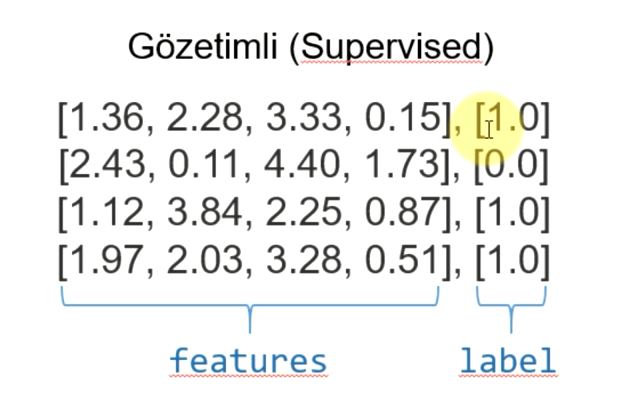

In [19]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\content.png")

In [137]:
assembler = VectorAssembler() \
.setInputCols(["yas","aylik_gelir","meslek_encoded","sehir_encoded"]) \
.setOutputCol("vectorized_features")

In [138]:
# Pandas dataframe head() metodundan satır truncate'i kaldırmak için 
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [139]:
vector_df = assembler.transform(encoder_df)
vector_df.select("vectorized_features").toPandas().head(15)

,vectorized_features
0,"(35.0, 3500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"
1,"(42.0, 4200.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)"
2,"(30.0, 9000.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)"
3,"(29.0, 4200.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
4,"(23.0, 4800.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0)"
5,"(33.0, 4250.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
6,"(29.0, 7300.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
7,"(31.0, 12000.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
8,"(33.0, 180000.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
9,"(46.0, 12000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)"


// Yas ve Aylik gelir zaten nümerik değerler oldugundan dogrudan onları direkt yazabiliriz encoded yapmamıza gerek yoktur.

**4.LABELINDEXER STEP**

In [149]:
label_indexer = StringIndexer() \
.setInputCol("ekonomik_durum") \
.setOutputCol("label")

In [150]:
label_indexer_model = label_indexer.fit(vector_df)
label_indexer_df = label_indexer_model.transform(vector_df)

In [151]:
label_indexer_df.select("vectorized_features","label").toPandas().head(15)

,vectorized_features,label
0,"(35.0, 3500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)",0.0
1,"(42.0, 4200.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)",0.0
2,"(30.0, 9000.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)",1.0
3,"(29.0, 4200.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0
4,"(23.0, 4800.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0)",0.0
5,"(33.0, 4250.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0
6,"(29.0, 7300.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0
7,"(31.0, 12000.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0
8,"(33.0, 180000.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0
9,"(46.0, 12000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0


**5.STANDARTSCALER STEP**

// Standartizasyon yapacagız çünkğ birçok machine learning algoritması nesneler arasındaki mesafeyi öklit mesafesi gibi mesafe hesaplama yöntemleri ile hesaplıyor eğer biz nitelikleri aynı ölçeğe yaklaştırmazsak büyük büyük ölçekler (örneğin : maas) küçük ölçekleri domine eder dolası ile küçük ölçekli değişkenlerin etkisi kaybolur bunu önlemek için standartizasyon yapacağız.

In [153]:
scaler = StandardScaler() \
.setInputCol("vectorized_features") \
.setOutputCol("features")

In [154]:
scaler_model = scaler.fit(label_indexer_df)
scaler_df = scaler_model.transform(label_indexer_df)

In [156]:
scaler_df.select("features","label").toPandas().head(15)

,features,label
0,"(5.0082809740601215, 0.07786916606045709, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175, 0.0, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0)",0.0
1,"(6.009937168872146, 0.0934429992725485, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175)",0.0
2,"(4.292812263480104, 0.20023499844117534, 0.0, 2.41522945769824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0)",1.0
3,"(4.149718521364101, 0.0934429992725485, 2.41522945769824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0
4,"(3.29115606866808, 0.10679199916862686, 2.41522945769824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175, 0.0, 0.0)",0.0
5,"(4.722093489828115, 0.09455541593055503, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0
6,"(4.149718521364101, 0.16241283206895335, 2.41522945769824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0
7,"(4.435906005596108, 0.2669799979215671, 0.0, 2.41522945769824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0
8,"(4.722093489828115, 4.004699968823507, 0.0, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0
9,"(6.58231213733616, 0.2669799979215671, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0


**6.TRAIN-TEST SPERATER STEP**

//Datasete uyguladıgımız Machine Learning algoritmalarının ne kadar iyi çalıştıgını anlamak için için datasetimizi train ve test olarak ikiye ayırıyoruz.

In [157]:
train_df, test_df = scaler_df.randomSplit([0.8,0.2], seed=142)

// 0.8,0.2 ifadeleri hangi oranlarda satır sececeğimizi belirtiyor.

In [165]:
train_df.toPandas().head(20)

,sirano,isim,yas,cinsiyet,meslek,sehir,aylik_gelir,mal_mulk,ekonomik_durum,meslek_index,sehir_index,meslek_encoded,sehir_encoded,vectorized_features,label,features
0,1,Cemal,35,E,Isci,Adana,3500.0,araba,kötü,6.0,2.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0)","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(35.0, 3500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(5.0082809740601215, 0.07786916606045709, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175, 0.0, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0)"
1,2,ceyda,42,K,Memur,Kayseri,4200.0,araba|ev,kötü,2.0,6.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)","(42.0, 4200.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)",0.0,"(6.009937168872146, 0.0934429992725485, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175)"
2,4,Burcu,29,K,Pazarlamaci,Trabzon,4200.0,araba,kötü,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(29.0, 4200.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(4.149718521364101, 0.0934429992725485, 2.41522945769824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
3,5,Yasemin,23,K,Pazarlamaci,Bursa,4800.0,araba,kötü,0.0,4.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0)","(23.0, 4800.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0)",0.0,"(3.29115606866808, 0.10679199916862686, 2.41522945769824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175, 0.0, 0.0)"
4,7,Dilek,29,K,Pazarlamaci,Istanbul,7300.0,araba|yazlik,iyi,0.0,1.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(29.0, 7300.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0,"(4.149718521364101, 0.16241283206895335, 2.41522945769824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0)"
5,8,Murat,31,E,Muzisyen,Istanbul,12000.0,araba|ev|dukkan|yazlik,iyi,1.0,1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(31.0, 12000.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0,"(4.435906005596108, 0.2669799979215671, 0.0, 2.41522945769824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0)"
6,11,Hicaziye,47,K,Tuhafiyeci,Istanbul,4.8,dukkan,kötü,5.0,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(47.0, 4.8, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(6.725405879452164, 0.00010679199916862685, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0)"
7,12,Harun,43,E,Tornaci,Trabzon,4200.0,araba,kötü,4.0,0.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(43.0, 4200.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(6.15303091098815, 0.0934429992725485, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
8,13,hakki,33,E,memur,Sakarya,3750.0,ev,kötü,8.0,5.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0)","(33.0, 3750.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0)",0.0,"(4.722093489828115, 0.08343124935048973, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175, 0.0)"
9,14,Gulizar,37,K,Doktor,Izmir,14250.0,araba,iyi,3.0,7.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(37.0, 14250.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0,"(5.294468458292129, 0.31703874753186095, 0.0, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"


In [159]:
test_df.toPandas().head(20)

,sirano,isim,yas,cinsiyet,meslek,sehir,aylik_gelir,mal_mulk,ekonomik_durum,meslek_index,sehir_index,meslek_encoded,sehir_encoded,vectorized_features,label,features
0,3,Timur,30,None,Muzisyen,Adana,9000.0,araba|ev|yazlik,iyi,1.0,2.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(30.0, 9000.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)",1.0,"(4.292812263480104, 0.20023499844117534, 0.0, 2.41522945769824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0)"
1,6,Ali,33,E,Memur,Trabzon,4250.0,ev,kötü,2.0,0.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(33.0, 4250.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",0.0,"(4.722093489828115, 0.09455541593055503, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
2,9,Ahmet,33,E,Doktor,Trabzon,180000.0,araba|ev|yazlik,iyi,3.0,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(33.0, 180000.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0,"(4.722093489828115, 4.004699968823507, 0.0, 0.0, 0.0, 2.8419928002940256, 0.0, 0.0, 0.0, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
3,10,Muhittin,46,E,Berber,Istanbul,12000.0,araba|ev|dukkan,iyi,7.0,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(46.0, 12000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0)",1.0,"(6.58231213733616, 0.2669799979215671, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8729833462074175, 0.0, 2.1846572437632577, 0.0, 0.0, 0.0, 0.0, 0.0)"


**7.BASIC MACHINE LEARNING MODEL SAMPLE**

In [160]:
from pyspark.ml.classification import LogisticRegression

In [166]:
lr_object = LogisticRegression() \
.setFeaturesCol("features") \
.setLabelCol("label") \
.setPredictionCol("prediction")

In [167]:
lr_model = lr_object.fit(train_df)

In [168]:
result_df = lr_model.transform(test_df)

In [169]:
result_df.select("label","prediction").toPandas().head()

,label,prediction
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
